# Machine Learning Training and Inference with PyTorch

This notebook demonstrate a Pytorch ML flow for training and inference on CPU. 

We will train a model to **classify grayscale images** of clothing items in the **Fashion-MNIST** dataset.
We are going to use your **CPU** to inference new images unseen during the training process and classify per clothing item class.

## 🛠️ Supported Hardware

This notebook can run in a CPU or in a GPU.

✅ AMD Instinct™ Accelerators  
✅ AMD Radeon™ RX/PRO Graphics Cards  
✅ AMD EPYC™ Processors  
✅ AMD Ryzen™ (AI) Processors  

Suggested hardware: **AI PC powered by AMD Ryzen™ AI Processors**

## ⚡ Recommended Software Environment

::::{tab-set}

:::{tab-item} Linux
- [Install Docker container](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::

:::{tab-item} Windows
- [Install Direct-ML](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu-windows.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::
::::

## 🎯 Goals

- Define a neural network architecture using PyTorch
- Train a neural network model to classify images from the Fashion-MNIST dataset
- Evaluate the model performance using a confusion matrix

```{seealso}

- **[Matplotlib Gallery](https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html)**  
  Explore various examples of how to use Matplotlib for visualizations.

- **[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)**  
  Access the dataset for training and testing fashion classification models.

- **[Confusion Matrix](https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7)**  
  Learn how to create and interpret confusion matrices in PyTorch.

- **[PyTorch Official Documentation](https://pytorch.org/docs/stable/index.html)**  
  Comprehensive guide and API reference for using PyTorch effectively.

- **[Best Practices for Training Neural Networks](https://pytorch.org/tutorials/beginner/nn_tutorial.html)**  
  A tutorial on best practices for training neural networks using PyTorch.
``

## Import Packages

Run the following cell to import all the necessary packages to be able to run training and inference in the Ryzen AI CPU.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sn

## Understanding the data

We'll a train model on the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with one of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. 

Fashion MNIST classes:
* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot


### Load data for training and inference

First, we load the train set, we define the directory where to store and force to be downloaded, we also transform the images to tensors.
After this, we load the test set, with very similar arguments.

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    "datasets/mnist",
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

test_set = torchvision.datasets.FashionMNIST(
    "datasets/mnist",
    download=True,
    train=False,
    transform=transforms.Compose([transforms.ToTensor()])
)

### Create dataloaders

Once the data and test sets are loaded, we create a train and a test `Dataloader`s to iterate over the images at training time. We pass the set and the batch size.

In [ ]:
batch_size = 100

train_loader = DataLoader(
    train_set,
    batch_size=batch_size
)

test_loader = DataLoader(
    test_set,
    batch_size=batch_size
)

### Visualize FashionMNIST dataset classes.

We create a method that return the name of class for the label number. e.g., if the label is 5, we return Sandal.

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([100, 1, 28, 28]) torch.Size([100])
labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, T-shirt/Top, Ankle Boot, Sandal, Sandal, Sneaker, Ankle Boot, Trouser, T-shirt/Top, Shirt, Coat, Dress, Trouser, Coat, Bag, Coat, Dress, T-shirt/Top, Pullover, Coat, Coat, Sandal, Dress, Shirt, Shirt, T-shirt/Top, Bag, Sandal, Pullover, Trouser, Shirt, Shirt, Sneaker, Ankle Boot, Sandal, Ankle Boot, Pullover, Sneaker, Dress, T-shirt/Top, Dress, Dress, Dress, Sneaker, Pullover, Pullover, Shirt, Shirt, Bag, Dress, Dress, Sandal, T-shirt/Top, Sandal, Sandal, T-shirt/Top, Pullover, T-shirt/Top, T-shirt/Top, Coat, Trouser, Dress, Trouser, Shirt, Dress, Trouser, Coat, Coat, Shirt, Trouser, Ankle Boot, Trouser, Dress, Sandal, Sneaker, Ankle Boot, Sneaker, Trouser, Sneaker, Ankle Boot, Ankle Boot, Ankle Boot, Dress, Pullover, Ankle Boot, Dress, Shirt, Coat, Trouser, Trouser, Bag, 

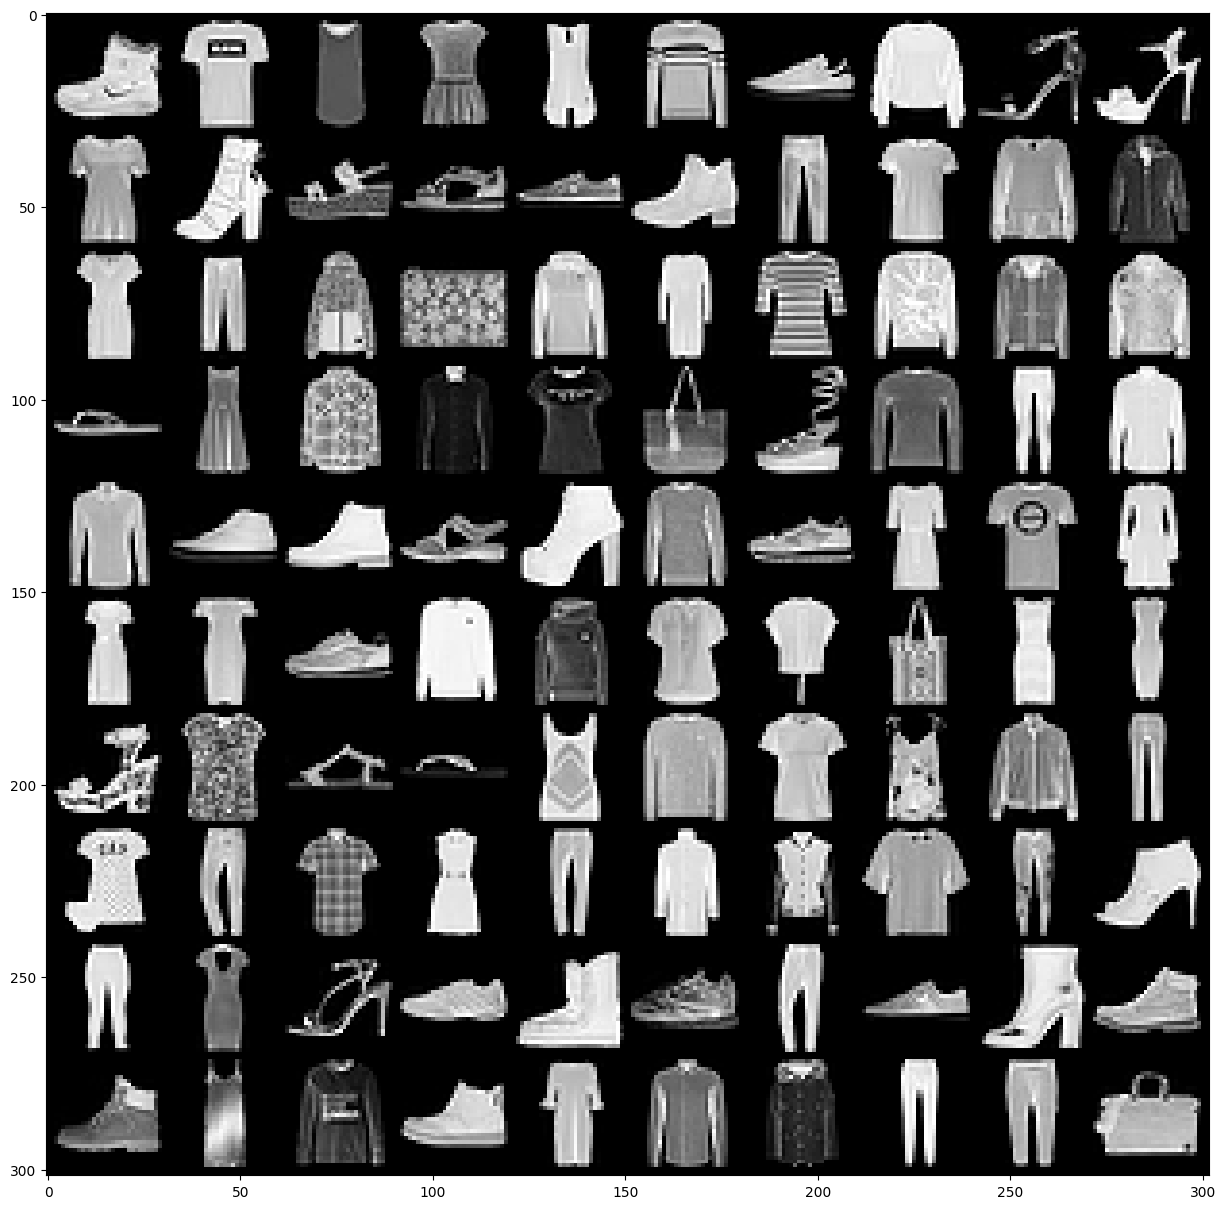

In [ ]:
def output_label(label):
    output_mapping = {
        0: "T-shirt/Top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat", 
        5: "Sandal", 
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle Boot"
    }
    input = (label.item() if isinstance(label, torch.Tensor) else label)
    return output_mapping[input]

Display a single batch of training data, we unpack the images and labels of a batch by calling `next` and `iter``on the `train_loader`, then we print the type of the images and labels. Finally, we display the shapes of the images and labels.

In [ ]:
images, labels = next(iter(train_loader))
print(type(images), type(labels))
print(images.shape, labels.shape)

We visualize in a grid the images we got from the `train_loader`. We also print the class names for each label in the batch

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
plt.axis('off')

print("labels: ", end=" ")
for _, label in enumerate(labels):
    print(output_label(label), end=", ") \

## Building a CNN Model

We create our `FashionCNN` by deriving from `torch.nn.Module` which is a super class for all the neural networks in Pytorch.

We define a nNeural network that has the following layers:
* Two Sequential layers each consists of following layers:
    * Convolution layer that has kernel size of 3 * 3, padding = 1 (zero_padding) in 1st layer and padding = 0 in second one. Stride of 1 in both layer
    * Batch Normalization layer
    * A ReLU activation function
    * Max Pooling layer with kernel size of 2 * 2 and stride 2
* After these two convolutional layers we define:
    * Flatten out the output for dense layer(a.k.a. fully connected layer)
    * 3 Fully connected layers with different input and output features maps
    * 1 Dropout layer that has class probability p = 0.25

All the functionality is given in the forward method that defines the forward pass of our CNN
* Our input image is changing in a following way:
* First convolution layer: input: 28 \* 28 \* 3, output: 28 \* 28 \* 32
* First Max Pooling layer: input: 28 \* 28 \* 32, output: 14 \* 14 \* 32
* Second convolution layer: input : 14 \* 14 \* 32, output: 12 \* 12 \* 64
* Second Max Pooling layer: 12 \* 12 \* 64, output:  6 \* 6 \* 64
* Final fully connected layer has 10 output features for 10 types of clothes

In [ ]:
class FashionCNN(nn.Module):

    def __init__(self):
        super(FashionCNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        """Forward pass gets executed every time we call the model"""

        out = self.layer1(x)
        out = self.layer2(out)
        flatten = out.view(out.size(0), -1)
        out = self.fc1(flatten)
        out = self.drop(out)
        out = self.fc2(out)
        return  self.fc3(out)

## Instantiate the Model

Once the model is defined, we can create an instance of the CNN model defined for FashionMNIST classification

In [ ]:
model = FashionCNN()
print(model)

## Train Model

After the model is instantiate we can train the model

### Set hyperparameters and loss function

Training the model is the process of making the model learn from the training dataset, setting the training parameters is a very important process as it will define how fast our model learns and if the process is stable. This process is sometimes referred as `hyperparameter` tunning.

The process involves

* Defining a loss function. we're using `CrossEntropyLoss()`
* Defining a learning rate, this is the weight that is used to update the model
* Defining an optimization technique, we are using the `Adam` algorithm

In [ ]:
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


### Training a network and testing it on test dataset

To train the network, we will setup the number of epochs for training. We create a few lists to keep the progress of the training loop.

For each epoch, we first iterate over the `train_loader`, were first we reshape the images to be of the dimension the model expects. Then we run the images through the model and we get the predictions, the nwe calculate the loss comparing the predicted labels with the actual labels, after this we reset the optimizer and run back propagation and apply the optimization.

We also test the model at regular intervals during training, we do a similar process, we iterate over the `test_loader` and count the correct number of predictions. We also keep track of the results.

In [ ]:
num_epochs = 30
count = 0

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        train = Variable(images.view(batch_size, 1, 28, 28))
        labels = Variable(labels)

        outputs = model(train)
        loss = error(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 50):
            total, correct = 0, 0
            for images, labels in test_loader:
                labels_list.append(labels)
                test = Variable(images.view(batch_size, 1, 28, 28))
                outputs = model(test)

                predictions = torch.max(outputs, 1)[1]
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()

                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.49585863947868347, Accuracy: 87.81999969482422%
Iteration: 1000, Loss: 0.36215996742248535, Accuracy: 87.58999633789062%
Iteration: 1500, Loss: 0.2785225808620453, Accuracy: 88.93000030517578%
Iteration: 2000, Loss: 0.2172258198261261, Accuracy: 89.05000305175781%
Iteration: 2500, Loss: 0.1593465358018875, Accuracy: 89.48999786376953%
Iteration: 3000, Loss: 0.1814488172531128, Accuracy: 89.94000244140625%
Iteration: 3500, Loss: 0.22667889297008514, Accuracy: 90.62999725341797%
Iteration: 4000, Loss: 0.21219101548194885, Accuracy: 90.27999877929688%
Iteration: 4500, Loss: 0.11486653983592987, Accuracy: 89.63999938964844%
Iteration: 5000, Loss: 0.28773391246795654, Accuracy: 90.31999969482422%
Iteration: 5500, Loss: 0.17376042902469635, Accuracy: 89.7300033569336%
Iteration: 6000, Loss: 0.11793597042560577, Accuracy: 89.9800033569336%
Iteration: 6500, Loss: 0.15039579570293427, Accuracy: 90.88999938964844%
Iteration: 7000, Loss: 0.14833183586597443, Accuracy: 90.0

### Visualizing the Loss and Accuracy with Iterations

After the training, we visualize the loss training progress

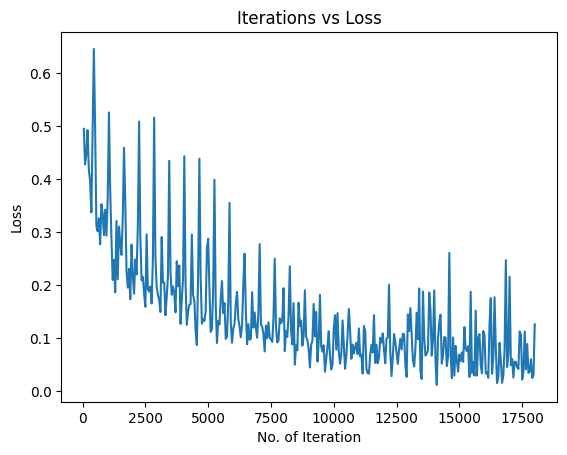

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

We are going going to visualize the accuracy progress

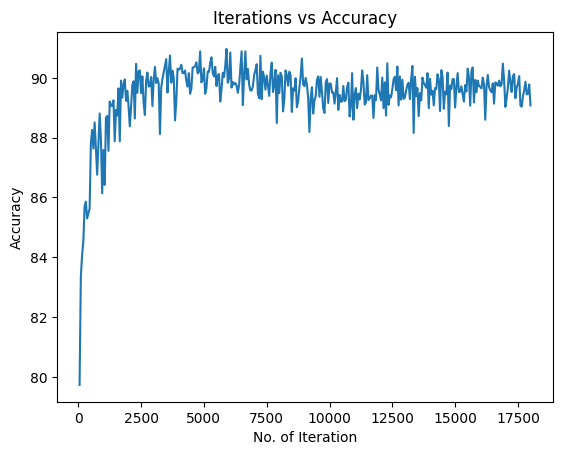

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

### Save PyTorch model

Once we are happy with the model, we can save it so we do not need to retrain it later on

In [24]:
torch.save(model.state_dict(), 'models/fashion-mnist.pt')

## Measure accuracy on entire test set

We are going to use the 10,000 images from the test set to classify them with our trained model. We calculate the accuracy of the fashion-mnist model on the CPU.

We create a few list to keep the progress of the accuracy computation. Then, we iterate over each image in the test set, we keep track of the actual label, we add the batch dimension to the image and run the inference with the model. Then, we apply a softmax to pick the top probability as the classification and we track the predicted class. We then check if the prediction was correct or not and track it.

In [ ]:
num_images = len(test_set)

cm_predicted_labels = []
cm_actual_labels = []
misclassified_images = []
misclassified_labels = []
correctly_classified_images = []

for i in range(num_images):
    img, label = test_set[i]
    cm_actual_labels.append(output_label(label))
    img = img.unsqueeze(0)

    outputs = model(img)
    softmax_probs = torch.softmax(outputs, dim=1)
    predicted_class = torch.argmax(softmax_probs, dim=1).item()
    cm_predicted_labels.append(output_label(predicted_class))

    if label != predicted_class:
        misclassified_images.append(i)
        misclassified_labels.append(output_label(predicted_class))
    else:
        correctly_classified_images.append(i)

Now, we can print the corrected classified images and the accuracy on images that the model did not see during training.

Total correctly classified images: 8348
Total misclassified images: 1652


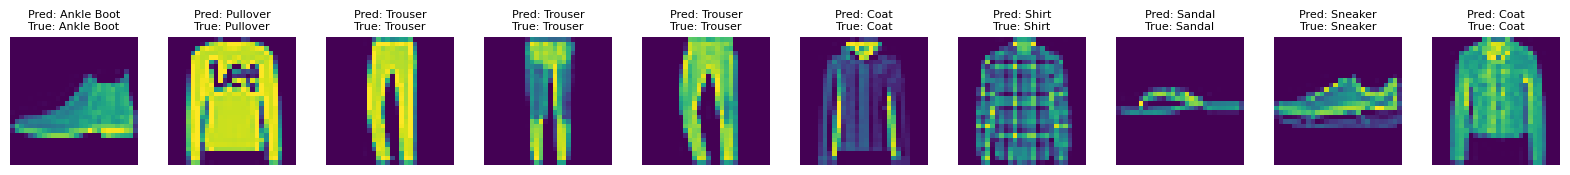

In [ ]:
print(f"Total correctly classified images: {num_images - len(misclassified_images)}")
print(f" Accuracy of the model for the test set is : {(accuracy_score(cm_actual_labels, cm_predicted_labels)*100):.2f} %")

We can also visualize the results of correct classification

In [ ]:
show_imlist_correct = [test_set[i][0].squeeze() for i in correctly_classified_images[:10]]
num_correct = len(show_imlist_correct)

fig = plt.figure(figsize=(2 * num_correct, 2))
grid = ImageGrid(fig, 111, nrows_ncols=(1, num_correct), axes_pad=0.3)

# Loop through the grid and display the correctly classified images
for ax, image, correct_idx in zip(grid, show_imlist_correct, correctly_classified_images[:num_correct]):
    ax.axis("off")
    predicted_label = cm_predicted_labels[correct_idx]
    actual_label = output_label(test_set[correct_idx][1])
    ax.imshow(image, cmap="viridis")  # Display image in grayscale
    ax.set_title(f"Pred: {predicted_label}\nTrue: {actual_label}", fontsize=8)

plt.show()

 Accuracy of the quantized model for the test set is : 83.48 %


## Confusion Matrix

We create the confusion matrix and display it.

The X-axis represents the predicted class and the Y-axis represents the actual class.

The diagonal cells show true positives, they show how many instances of each class were correctly predicted by the model. 
The off-diagonal cells show instances where the predicted class did not match the actual class.

<Axes: >

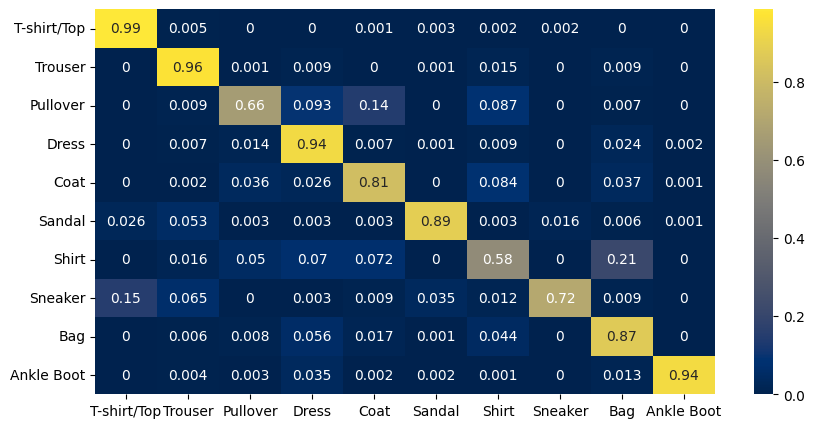

In [ ]:
cf_matrix = confusion_matrix(cm_actual_labels, cm_predicted_labels)

df = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1),
                  index=[output_label(i) for i in range(10)],
                  columns=[output_label(i) for i in range(10)])


plt.figure(figsize=(10, 5))
sn.heatmap(df, annot=True, cmap="cividis")

## Display any Mis-classifications

Finally, we can also display some images that were mis-classified

Total misclassified images: 1652


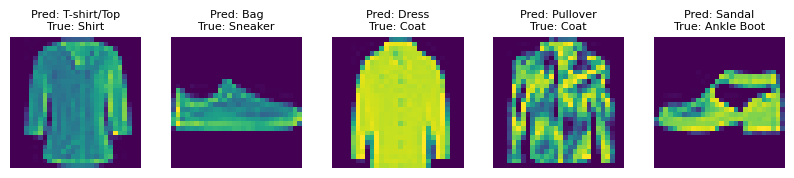

In [ ]:
print(f"Total misclassified images: {len(misclassified_images)}")

show_imlist_mis = [test_set[i][0].squeeze() for i in misclassified_images[:5]]
num_misclassified = len(show_imlist_mis)

fig = plt.figure(figsize=(2 * num_misclassified, 2))
grid = ImageGrid(fig, 111, nrows_ncols=(1, num_misclassified), axes_pad=0.3)

for ax, image, mis_idx in zip(grid, show_imlist_mis, misclassified_images[:num_misclassified]):
    ax.axis("off")
    ax.imshow(image, cmap="viridis")  # Changed the colormap to 'gray' for better visual
    predicted_label = misclassified_labels[misclassified_images.index(mis_idx)]
    actual_label = output_label(test_set[mis_idx][1])
    ax.set_title(f"Pred: {predicted_label}\nTrue: {actual_label}", fontsize=8)

plt.show()

----------
Copyright (C) 2025 Advanced Micro Devices, Inc. All rights reserved.

SPDX-License-Identifier: MIT